<a href="https://colab.research.google.com/github/leehgkor/lhg/blob/main/(3)_%EA%B5%AC%EA%B0%84%EB%B3%84_%EB%B9%88%EB%8F%84_%EB%B6%84%EC%84%9D(%ED%98%84%EB%8C%80%EC%96%B4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# step 1: 필요한 라이브러리 임포트
!pip install koreanize-matplotlib konlpy pandas scikit-learn

import os
import re
import chardet
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 17.9 MB/s eta 0:00:00


In [ ]:
# step 2: 파일 읽기 및 인코딩 확인

def read_file_with_encoding(filepath):
    with open(filepath, 'rb') as f:
        raw_data = f.read()
        detected_encoding = chardet.detect(raw_data)['encoding']
        print(f"Detected encoding: {detected_encoding}")
    with open(filepath, 'r', encoding=detected_encoding) as f:
        content = f.read()
    return content

# 파일 경로 설정
file_path = "/content/이문열___우리들의_일그러진_영웅___86쪽.txt"
text_data = read_file_with_encoding(file_path)
print("텍스트 (앞부분):")
print(text_data[:500])  # 첫 500자 출력

Detected encoding: utf-8
텍스트 (앞부분):
우리들의 일그러진 영웅  


이문열               

벌써 삼십 년이 다 돼 가지만, 그해 봄에서 가을까지의 외롭고 힘들었던 싸움을 돌이켜 보면 언제나 그때처럼 막막하고 암담해진다. 어쩌면 그런 싸움이야말로 우리 살이[生]가 흔히 빠지게 되는 어떤 상태이고, 그래서 실은 아직도 내가 거기서 벗어나지 못했기 때문에 받게 되는 느낌인지도 모르겠다. 

자유당 정권이 아직은 그 마지막 기승을 부리고 있던 그해 삼 월중순, 나는 그때껏 자랑스레 다니던 서울의 명문 국민학교를 떠나 한 작은 읍(邑)의 별로 볼것없는 국민학교로 전학을 가게 되었다. 공무원이었다 

가 바람을 맞아 거기까지 날려간 아버지를 따라 가족 모두가 이사를 가게 된 까닭이었는, 그때 나는 열두 살 에 갓 올라간 5학년이었다. 

그 전학 첫날 어머님의 손에 이끌려 들어서게 된 Y 국민학교는 여러 가지로 실망스럽기 그지없었다. 

붉은 별돌로 지은 웅장한 3층 본관을 중심으로 줄줄이 늘어섰던 새 교사(校舍)만 


In [ ]:
# step 3: 텍스트 전처리

def remove_tags_and_content(text):
    # 태그와 태그 안의 내용을 완전히 제거
    cleaned_text = re.sub(r"<[^>]*?>.*?</[^>]*?>", "", text)  # 닫는 태그와 함께 제거
    cleaned_text = re.sub(r"<[^>]+>", "", cleaned_text)  # Self-closing 태그 제거
    return cleaned_text.strip()

cleaned_text = remove_tags_and_content(text_data)

# 전처리된 텍스트의 앞부분 출력
print("전처리된 텍스트 (앞부분):")
print(cleaned_text[:500])  # 첫 500자 출력


전처리된 텍스트 (앞부분):
우리들의 일그러진 영웅  


이문열               

벌써 삼십 년이 다 돼 가지만, 그해 봄에서 가을까지의 외롭고 힘들었던 싸움을 돌이켜 보면 언제나 그때처럼 막막하고 암담해진다. 어쩌면 그런 싸움이야말로 우리 살이[生]가 흔히 빠지게 되는 어떤 상태이고, 그래서 실은 아직도 내가 거기서 벗어나지 못했기 때문에 받게 되는 느낌인지도 모르겠다. 

자유당 정권이 아직은 그 마지막 기승을 부리고 있던 그해 삼 월중순, 나는 그때껏 자랑스레 다니던 서울의 명문 국민학교를 떠나 한 작은 읍(邑)의 별로 볼것없는 국민학교로 전학을 가게 되었다. 공무원이었다 

가 바람을 맞아 거기까지 날려간 아버지를 따라 가족 모두가 이사를 가게 된 까닭이었는, 그때 나는 열두 살 에 갓 올라간 5학년이었다. 

그 전학 첫날 어머님의 손에 이끌려 들어서게 된 Y 국민학교는 여러 가지로 실망스럽기 그지없었다. 

붉은 별돌로 지은 웅장한 3층 본관을 중심으로 줄줄이 늘어섰던 새 교사(校舍)만 


In [ ]:
# step 4: 텍스트 구간 분절

def split_text_into_segments(text, num_segments):
    lines = text.splitlines()
    lines = [line.strip() for line in lines if line.strip()]  # 빈 줄 제거
    segment_size = len(lines) // num_segments
    segments = [lines[i * segment_size: (i + 1) * segment_size] for i in range(num_segments)]
    segments = [" ".join(segment) for segment in segments]
    return segments

# 구간 설정
segments = split_text_into_segments(cleaned_text, 5)
print(segments)

["우리들의 일그러진 영웅 이문열 벌써 삼십 년이 다 돼 가지만, 그해 봄에서 가을까지의 외롭고 힘들었던 싸움을 돌이켜 보면 언제나 그때처럼 막막하고 암담해진다. 어쩌면 그런 싸움이야말로 우리 살이[生]가 흔히 빠지게 되는 어떤 상태이고, 그래서 실은 아직도 내가 거기서 벗어나지 못했기 때문에 받게 되는 느낌인지도 모르겠다. 자유당 정권이 아직은 그 마지막 기승을 부리고 있던 그해 삼 월중순, 나는 그때껏 자랑스레 다니던 서울의 명문 국민학교를 떠나 한 작은 읍(邑)의 별로 볼것없는 국민학교로 전학을 가게 되었다. 공무원이었다 가 바람을 맞아 거기까지 날려간 아버지를 따라 가족 모두가 이사를 가게 된 까닭이었는, 그때 나는 열두 살 에 갓 올라간 5학년이었다. 그 전학 첫날 어머님의 손에 이끌려 들어서게 된 Y 국민학교는 여러 가지로 실망스럽기 그지없었다. 붉은 별돌로 지은 웅장한 3층 본관을 중심으로 줄줄이 늘어섰던 새 교사(校舍)만 보아 온 내게는, 낡은 일본 식 시멘트 건물 한 채와 검은 타르를 칠한 판자 가교사(假校舍) 몇 채로 이루어진 그 학교나 어찌나 초라해 보이는지 갑자기 영락한 소공자(少公子)의 비애(悲哀)같은 턱없는 감상에 젖어들기까지 했다. 크다는 것과 좋 다는 것은 무관함에도 불구하고, 한 학년이 열여섯 학급이나 되는 학교에서 공부해 온 탓인지 한 학년이 겨 우 여섯 학급밖에 안된다는 것도 그 학교를 까닭 없이 얕보게 했고, 남녀가 섞인 반에서만 공부해 온 눈에는 남학생반 여학생반이 엄격하게 나뉘어져 있는 것도 촌스럽게만 보였다. 거기다가 그런 내 첫인상을 더욱 굳혀 준 것은 교무실이었다. 내가 그때껏 다녔던 학교의 교무실은 서 울에서도 손꼽는 학교답게 넓고 번들거렸고, 거기 있는 선생님들도 한결같이 깔끔하고 활기에 찬 이들이었 다. 그런데 겨울 교실 하나 넓이의 그 교무실에는 시골 아저씨들처럼 후줄그레한 선생님들이 맥없이 앉아 굴뚝같이 담배 연기만 뿜어 대고 있는 것이었다. 나를 데리고 교무실로 들어서는 어머니를 알아보고 다가오는 담임 선

In [ ]:
# step 5: 형태소 분석기 적용, 명사만 추출

from konlpy.tag import Okt

tokenizer = Okt()

def tokenize_and_clean(text):
    tokens = tokenizer.nouns(text)  # 명사만 추출
    return tokens

tokenized_corpus = [" ".join(tokenize_and_clean(segment)) for segment in segments]

print("토큰화된 텍스트 (첫 번째 구간):")
print(tokenized_corpus[0])


토큰화된 텍스트 (첫 번째 구간):
우리 영웅 이문열 벌써 삼십 년 가지 봄 가을 외 싸움 그때 어쩌면 싸움 우리 살이 상태 실 내 거기 때문 느낌 인지도 자유당 정권 은 그 마지막 기승 부리고 삼 월 중순 나 그때 껏 서울 명문 국민학교 읍 의 별로 국민학교 전학 가게 공무원 바람 거기 간 아버지 가족 모두 이사 가게 까닭 그때 나 살 갓 학년 그 전학 첫날 어머님 손 국민학교 여러 가지 실망 그 돌 지은 웅장 층 본관 중심 줄줄이 새 교사 만 보아 온 일본 식 시멘트 건물 채 타르 판자 가교 사 몇 채 그 학교 갑자기 영락 소공자 의 비애 턱 감상 것 것 무관 함 불구 학년 여섯 학급 학교 공부 온 탓 학년 겨 여섯 학급 것 그 학교 까닭 남녀 반 공부 온 눈 남학생 반 여학생 반 것 거기 다가 내 첫인상 더욱 준 것 교 내 그때 껏 학교 교무 실 울 학교 답 번들거렸 거기 선생님 활기 찬 이 겨울 교실 하나 넓이 그 교무 실 시골 아저씨 후줄그레 선생님 맥 굴뚝 담배 연기 뿜어 대고 것 데리 교무 실로 어머니 담임 선생님 내 기대 선생님 못 멋쟁이 선생님 줄 았았 막걸리 방울 이 튀어 양복 도리 소매 머리 기름 빗질 안해 부스스 머리 그날 아침 세수 얼굴 어머님 말씀 듣는둥 마는 둥 그 담임 선 생 실망 수가 그 뒤 일 년 악연 이 그때 벌써 예 감 일 그 악연 잠시 뒤 아이 소개 때 모습 전학 온 병태 앞 담임 선생 그 마디 소래 뒤 뒤쪽 빈 자리 바로 수업 전학 온 아이 대해 호들갑 정도 자랑 소개 서울 선생님 상기 하자 나 느낌 누 길이 추 움 최소한 내 자랑 거리 아이 그게 시작 그 관계 도움 그때 나름 만 게 몇 첫째 공부 일등 자주 나 그 별난 서울 일류 학교 반 다섯 손가락 안 선생님 아이 관 계 내 이익 데 적지 몫 내 은근 또 나 그림 솜씨 역시 전국 어린이 미술 대회 정도 서울시 규모 대회 몇 번의 특선 만 내 성적 그 점도 어머니 몇 번 강조 듯 담임 선생 은 그 모두 무시 것 내 아버지 직업 경우 따라서 힘 만 바람 호 서울 거기 가

In [ ]:
# step 6: TF-IDF를 활용한 핵심어 추출

# 사용자 지정 불용어
custom_stopwords = ["때문", "사람", "이것", "그것", "우리", "그녀", "자기", "생각", "자네", "저것", '그때', "아이", "너희", "다시" ]

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=500, stop_words=custom_stopwords)  # 상위 500개 단어 제한
X = vectorizer.fit_transform(tokenized_corpus)
feature_names = vectorizer.get_feature_names_out()

# 각 구간별로 핵심어 추출
def extract_top_keywords(tfidf_matrix, feature_names, top_n=10):
    top_keywords = {}
    for i, row in enumerate(tfidf_matrix.toarray()):
        top_indices = row.argsort()[-top_n:][::-1]  # 상위 N개 단어의 인덱스
        keywords = [(feature_names[idx], row[idx]) for idx in top_indices]
        top_keywords[f"구간 {i + 1}"] = keywords
    return top_keywords

top_keywords = extract_top_keywords(X, feature_names, top_n=5)


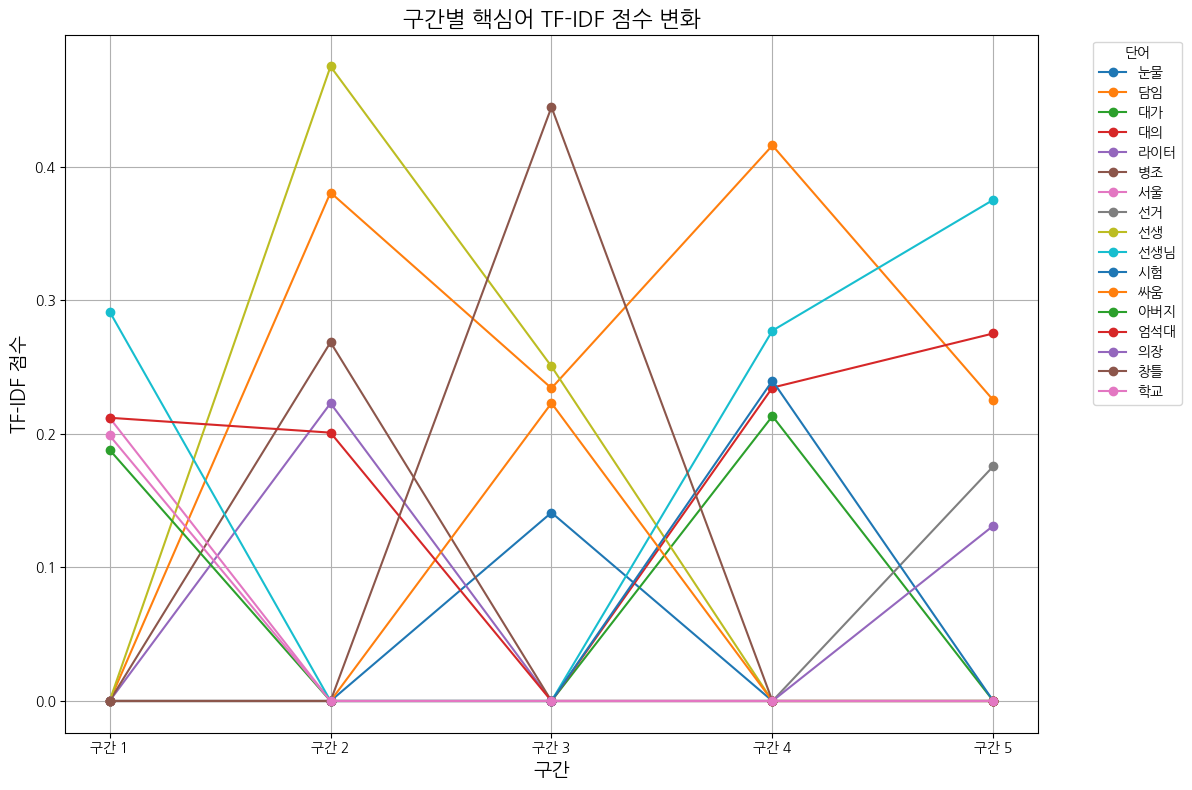


구간 1의 상위 핵심어:
선생님: 0.2917
서울: 0.2121
엄석대: 0.2121
학교: 0.1989
아버지: 0.1881

구간 2의 상위 핵심어:
선생: 0.4753
담임: 0.3808
병조: 0.2687
라이터: 0.2230
엄석대: 0.2010

구간 3의 상위 핵심어:
창틀: 0.4448
선생: 0.2506
담임: 0.2343
싸움: 0.2231
눈물: 0.1411

구간 4의 상위 핵심어:
담임: 0.4161
선생님: 0.2774
시험: 0.2399
대의: 0.2347
대가: 0.2134

구간 5의 상위 핵심어:
선생님: 0.3754
대의: 0.2753
담임: 0.2252
선거: 0.1759
의장: 0.1313


In [ ]:
# step 7: 결과 정리 및 시각화

# 데이터를 DataFrame으로 변환
data = []
for segment, keywords in top_keywords.items():
    for word, score in keywords:
        data.append({"구간": segment, "단어": word, "TF-IDF 점수": score})
keywords_df = pd.DataFrame(data)

# 피벗 테이블 생성 (단어별 구간 점수로 변환)
pivot_df = keywords_df.pivot(index="단어", columns="구간", values="TF-IDF 점수").fillna(0)

# 라인 그래프 생성
plt.figure(figsize=(12, 8))
for word in pivot_df.index:
    plt.plot(pivot_df.columns, pivot_df.loc[word], marker="o", label=word)

# 그래프 세부 설정
plt.title("구간별 핵심어 TF-IDF 점수 변화", fontsize=16)
plt.xlabel("구간", fontsize=14)
plt.ylabel("TF-IDF 점수", fontsize=14)
plt.legend(title="단어", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()

# 결과 출력
for segment, keywords in top_keywords.items():  # key가 "구간 n", value가 (단어, 점수) 튜플 리스트
    print(f"\n{segment}의 상위 핵심어:")
    for word, score in keywords:
        print(f"{word}: {score:.4f}")